Environment and Libraries

In [1]:
from pathlib import Path # pathlib for easy path handling
import pydicom # pydicom to handle dicom files
import matplotlib.pyplot as plt
import numpy as np
import os
import dicom2nifti # to convert DICOM files to the NIftI format
import nibabel as nib # nibabel to handle nifti files

from typing import Tuple
from batchgenerators.utilities.file_and_folder_operations import save_json, join
from nilearn.image import binarize_img

Preprocessing Data (Input: Scans-DICOM, Masks-PLY, Out: Scans-Nifty)

------------------------------
Loading and preprocessing training data...
------------------------------
Patient Scan Data Folders Included in Run:  ['15A_AutoBind_WaterWATER_450']


Segmentation Mask:  1_R_tibia_15A
Patient Scan Data:  15A_AutoBind_WaterWATER_450
Height of Paitent in mm:  1523.5
Length of Paitent AOI (tibia) in mm:  315.1292724609375


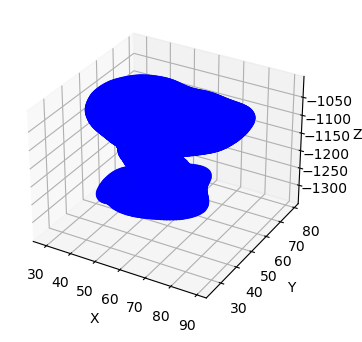

AOI Slice Start:  684
AOI Slice End:  893
AOI Slice Range:  210
Mask Slices Normalized to MRI Scans Shape (Purely AOI):  (210, 512, 512)


Masks Binarised
Number of Paitents:  1
Training Scans Input Shape:  (210, 512, 512)
Training Masks Input Shape:  (210, 512, 512)
Memory usage of training_scans: 210 MB.
Memory usage of train_mask_tibia_labels: 420 MB.


Final Training Image Input Shape:  (210, 512, 512, 1)
Final Training Mask Input Shape:  (210, 512, 512, 1)
------------------------------
Completed Preprocessing Stage!
------------------------------


In [51]:
from preprocessing import preprocessing
import numpy as np
print('-'*30)
print('Loading and preprocessing training data...')
print('-'*30)


total_slices_raw_data = 1015
DataOnlyAOI = True
scans_path = '/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti'
segmasks_fnames = ['1_R_tibia_15A']
scan_data_folders = ['15A_AutoBind_WaterWATER_450']

imgs_train, imgs_mask_train = preprocessing(scans_path, segmasks_fnames, scan_data_folders, total_slices_raw_data, DataOnlyAOI)

if (DataOnlyAOI == False):
    imgs_train = np.reshape(imgs_train, (len(scan_data_folders) * total_slices_raw_data, 512, 512))
    imgs_mask_train = np.reshape(imgs_mask_train, (len(segmasks_fnames) * total_slices_raw_data, 512, 512))
    imgs_train = np.expand_dims(imgs_train, axis=-1)
    imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)

if (DataOnlyAOI == True):
    imgs_train = np.expand_dims(imgs_train, axis=-1)
    imgs_mask_train = np.expand_dims(imgs_mask_train, axis=-1)

print("\n")
print('Final Training Image Input Shape: ', imgs_train.shape)
print('Final Training Mask Input Shape: ', imgs_mask_train.shape)

imgs_train_nii = nib.Nifti1Image(imgs_train, affine=nii_mask.affine)
scan_nifti_path = '/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/15A_AutoBind_WaterWATER_450.nii.gz'
nib.save(imgs_train_nii, scan_nifti_path)

# imgs_mask_train_nii = nib.Nifti1Image(imgs_mask_train, affine=np.eye(4), header = imgs_train_nii.header)
# mask = binarize_img(imgs_mask_train_nii, threshold = "0%")
# mask_path = "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/1_R_tibia_15A.nii.gz"
# nib.save(imgs_mask_train_nii, mask_path)

print('-'*30)
print('Completed Preprocessing Stage!')
print('-'*30)

[[-9.37500000e-01  0.00000000e+00  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00 -9.37500000e-01  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50246549e+00 -1.51250000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(210, 512, 512, 1)


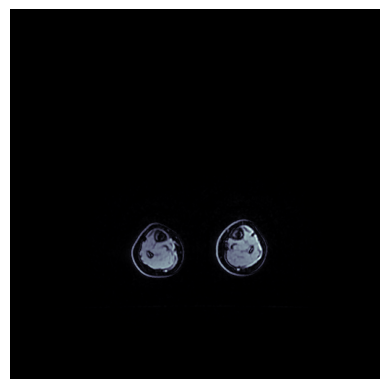

[[-9.37500000e-01  0.00000000e+00  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00 -9.37500000e-01  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50246549e+00 -1.51250000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(512, 512, 1015)


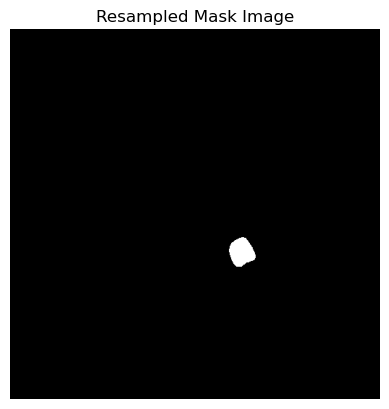

In [56]:
scan = nib.load(scan_nifti_path)
print(scan.affine)
scan_data = scan.get_fdata()
print(scan_data.shape)
plt.imshow(scan_data[130], cmap='bone')
plt.axis('off')
plt.show()

mask_path = "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/Tibia_015.nii.gz"
nii_mask = nib.load(mask_path)
print(nii_mask.affine)
mask_data = nii_mask.get_fdata()
print(mask_data.shape)
plt.imshow(np.squeeze(mask_data[:,:,130]), cmap='gray')
plt.title('Resampled Mask Image')
plt.axis('off')
plt.show()

version 2

(210, 512, 512, 1)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
(210, 512, 512, 1)
0.0004073370070684524


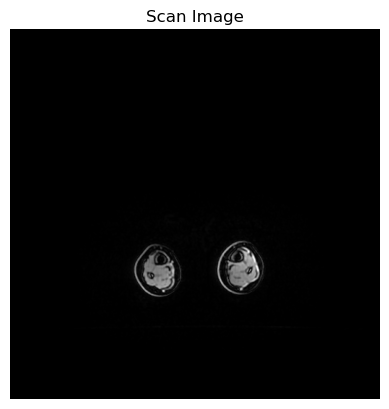

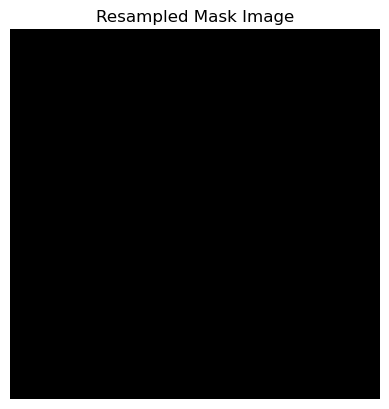

In [49]:
from nilearn.image import resample_to_img
import skimage.transform as st
scan = nib.load(scan_nifti_path)
scan_data = scan.get_fdata()
# print(scan_data.shape)
# plt.imshow(scan_data[150], cmap='bone')
# plt.axis('off')
# plt.show()


mask_path = "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/Tibia_015.nii.gz"
nii_mask = nib.load(mask_path)
mask_data = nii_mask.get_fdata()


# Resample the second image to match the dimensions of the first image
#nii_mask_resampled = resample_to_img(nii_mask, scan, interpolation='continuous')
#scan_resampled = resample_to_img(scan, nii_mask)

# mask_data = nii_mask.get_fdata()
# print(mask_data.shape)
# plt.imshow(mask_data[:,:,150], cmap='bone')
# plt.axis('off')
# plt.show()

#chatgpt
#resampled_nii_mask_data = nii_mask_resampled.get_fdata()
#resampled_scan_data = scan_resampled.get_fdata()

new_mask_data = st.resize(mask_data, (210, 512, 512, 1), order=0, preserve_range=True, anti_aliasing=False)

print(scan.shape)
print(scan.affine)

print(new_mask_data.shape)
print(np.average(new_mask_data))



plt.imshow(np.squeeze(scan_data[150]), cmap='gray')
plt.title('Scan Image')
plt.axis('off')
plt.show()

# print(resampled_scan_data.shape)
# plt.imshow(np.squeeze(resampled_scan_data[:, :, 150]), cmap='gray')
# plt.title('Resampled Scan Image')
# plt.axis('off')
# plt.show()

# Plot the mask image
# plt.imshow(np.squeeze(mask_data[:, :, 150]), cmap='gray')
# plt.title('Mask Image')
# plt.axis('off')
# plt.show()

plt.imshow(np.squeeze(new_mask_data[150]), cmap='gray')
plt.title('Resampled Mask Image')
plt.axis('off')
plt.show()


Flipping coordinates

In [36]:
fnames= ['Tibia_008', 'Tibia_009', 'Tibia_010', 'Tibia_015', 'Tibia_016']
translate_y = True
flip_direction = True

for fname in fnames:
    print(fname)
    
    nii_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/{}.nii.gz').format(fname)
    nii_img = nib.load(nii_file_path)
    affine_matrix = nii_img.affine
    direction_mask = affine_matrix[:3, :3]
    origin_coordinates_mask = affine_matrix[:3, 3]
    print("Mask Origin Coordinates:", origin_coordinates_mask)
    print("Mask Direction Matrix:", direction_mask)
    print('\n')

    nii_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/{}.nii.gz').format(fname)
    nii_img = nib.load(nii_file_path)
    affine_matrix = nii_img.affine
    direction = affine_matrix[:3, :3]
    origin_coordinates = affine_matrix[:3, 3]
    print("Scan Origin Coordinates:", origin_coordinates)
    print("Scan Direction Matrix:", direction)
    print('\n')

    if (translate_y == True):
        nii_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/{}.nii.gz').format(fname)
        nii_img = nib.load(nii_file_path)
        affine_matrix = nii_img.affine

        affine_matrix[:3, 3] = origin_coordinates_mask
        modified_nii_img = nib.Nifti1Image(nii_img.get_fdata(), affine_matrix)

        output_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/{}.nii.gz').format(fname)
        nib.save(modified_nii_img, output_file_path)
        print("Scan Origin coordinates modified and file rewritten!")

        nii_img = nib.load(nii_file_path)
        affine_matrix = nii_img.affine
        origin_coordinates_scan = affine_matrix[:3, 3]
        print("Scan Origin Coordinates (Modified):", origin_coordinates)
        print('\n')

    if (flip_direction == True):
        nii_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/{}.nii.gz').format(fname)
        nii_img = nib.load(nii_file_path)
        direction = affine_matrix[:3, :3]

        affine_matrix[:3, :3] = direction_mask
        modified_nii_img = nib.Nifti1Image(nii_img.get_fdata(), affine_matrix)

        output_file_path = ('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/{}.nii.gz').format(fname)
        nib.save(modified_nii_img, output_file_path)
        print("Scan direction modified and file rewritten!")

        nii_img = nib.load(nii_file_path)
        affine_matrix = nii_img.affine
        direction_scan = affine_matrix[:3, :3]
        print("Scan Direction (Modified):", direction_scan)
        print('\n')


    if (np.array_equal(np.array(origin_coordinates_scan), np.array(origin_coordinates_mask)) == True):
        print(('Mask and Scan Coordinate Systems Matching! ({})').format(fname))
    else:
        print('ERROR: Mask and Scan Coordinate Systems Mismatch!')
    if (np.array_equal(np.array(direction_scan), np.array(direction_mask)) == True):
        print(('Mask and Scan Directions Matching! ({})').format(fname)) 
    else:
        print('ERROR: Mask and Scan Direction Mismatch!')
    print('\n')


Tibia_008
Mask Origin Coordinates: [  239.53125   239.53125 -1297.5    ]
Mask Direction Matrix: [[-0.9375      0.          0.        ]
 [ 0.         -0.9375      0.        ]
 [ 0.          0.          1.50229621]]


Scan Origin Coordinates: [  239.53125   239.53125 -1297.5    ]
Scan Direction Matrix: [[-0.9375      0.          0.        ]
 [ 0.         -0.9375      0.        ]
 [ 0.          0.          1.50229621]]


Scan Origin coordinates modified and file rewritten!
Scan Origin Coordinates (Modified): [  239.53125   239.53125 -1297.5    ]


Scan direction modified and file rewritten!
Scan Direction (Modified): [[-0.9375      0.          0.        ]
 [ 0.         -0.9375      0.        ]
 [ 0.          0.          1.50229621]]


Mask and Scan Coordinate Systems Matching! (Tibia_008)
Mask and Scan Directions Matching! (Tibia_008)


Tibia_009
Mask Origin Coordinates: [  239.53125   239.53125 -1512.5    ]
Mask Direction Matrix: [[-0.9375      0.          0.        ]
 [ 0.         -0.93

Check affines


In [39]:
mask = nib.load('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/Tibia_008.nii.gz')
scan = nib.load('/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/Tibia_008.nii.gz')
print(mask.affine)
print(scan.affine)


[[-9.37500000e-01  0.00000000e+00  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00 -9.37500000e-01  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50229621e+00 -1.29750000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[-9.37500000e-01  0.00000000e+00  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00 -9.37500000e-01  0.00000000e+00  2.39531250e+02]
 [ 0.00000000e+00  0.00000000e+00  1.50229621e+00 -1.29750000e+03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


Verification

(512, 512, 872)


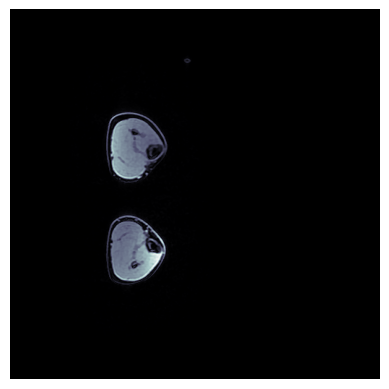

(512, 512, 872)


(-0.5, 511.5, 511.5, -0.5)

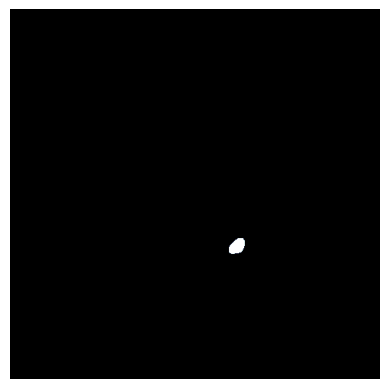

In [38]:
scan_nifti_path = '/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/MRI Scans - Tairawhiti - Nifti/15A_AutoBind_WaterWATER_450.nii.gz'
nib.load(scan_nifti_path)
new_image_data = new_image.get_fdata()
print(new_image_data.shape)
plt.imshow(new_image_data[180], cmap='bone')
plt.axis('off')
plt.show()

mask_path = "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports/1_R_tibia_15A.nii"
mask = nib.load(mask_path)
mask = binarize_img(mask, threshold = "0%")
nib.save(mask, "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/Mask_exports - Nifti/1_R_tibia_15A.nii.gz")

mask_data = mask.get_fdata()
print(new_image_data.shape)
plt.imshow(mask_data[180], cmap='bone')
plt.axis('off')
plt.show()




#patients_folders = os.listdir(path_to_all_patients)
#for patient in patients_folder:
#dicom2nifti.convert_directorylos.path.join (path_to_all_patients, patient), os.path.join(k)



Generate dataset json



In [10]:
def generate_dataset_json(output_folder: str,
                          channel_names: dict,
                          labels: dict,
                          num_training_cases: int,
                          file_ending: str,
                          regions_class_order: Tuple[int, ...] = None,
                          dataset_name: str = None, reference: str = None, release: str = None, license: str = None,
                          description: str = None,
                          overwrite_image_reader_writer: str = None, **kwargs):
    """
    Generates a dataset.json file in the output folder

    channel_names:
        Channel names must map the index to the name of the channel, example:
        {
            0: 'T1',
            1: 'CT'
        }
        Note that the channel names may influence the normalization scheme!! Learn more in the documentation.

    labels:
        This will tell nnU-Net what labels to expect. Important: This will also determine whether you use region-based training or not.
        Example regular labels:
        {
            'background': 0,
            'left atrium': 1,
            'some other label': 2
        }
        Example region-based training:
        {
            'background': 0,
            'whole tumor': (1, 2, 3),
            'tumor core': (2, 3),
            'enhancing tumor': 3
        }

        Remember that nnU-Net expects consecutive values for labels! nnU-Net also expects 0 to be background!

    num_training_cases: is used to double check all cases are there!

    file_ending: needed for finding the files correctly. IMPORTANT! File endings must match between images and
    segmentations!

    dataset_name, reference, release, license, description: self-explanatory and not used by nnU-Net. Just for
    completeness and as a reminder that these would be great!

    overwrite_image_reader_writer: If you need a special IO class for your dataset you can derive it from
    BaseReaderWriter, place it into nnunet.imageio and reference it here by name

    kwargs: whatever you put here will be placed in the dataset.json as well

    """
    has_regions: bool = any([isinstance(i, (tuple, list)) and len(i) > 1 for i in labels.values()])
    if has_regions:
        assert regions_class_order is not None, f"You have defined regions but regions_class_order is not set. " \
                                                f"You need that."
    # channel names need strings as keys
    keys = list(channel_names.keys())
    for k in keys:
        if not isinstance(k, str):
            channel_names[str(k)] = channel_names[k]
            del channel_names[k]

    # labels need ints as values
    for l in labels.keys():
        value = labels[l]
        if isinstance(value, (tuple, list)):
            value = tuple([int(i) for i in value])
            labels[l] = value
        else:
            labels[l] = int(labels[l])

    dataset_json = {
        'channel_names': channel_names,  # previously this was called 'modality'. I didnt like this so this is
        # channel_names now. Live with it.
        'labels': labels,
        'numTraining': num_training_cases,
        'file_ending': file_ending,
    }

    if dataset_name is not None:
        dataset_json['name'] = dataset_name
    if reference is not None:
        dataset_json['reference'] = reference
    if release is not None:
        dataset_json['release'] = release
    if license is not None:
        dataset_json['licence'] = license
    if description is not None:
        dataset_json['description'] = description
    if overwrite_image_reader_writer is not None:
        dataset_json['overwrite_image_reader_writer'] = overwrite_image_reader_writer
    if regions_class_order is not None:
        dataset_json['regions_class_order'] = regions_class_order

    dataset_json.update(kwargs)

    save_json(dataset_json, join(output_folder, 'dataset.json'), sort_keys=False)


#generate_dataset_json(output_folder: str, channel_names: dict, labels: dict, num_training_cases: int, file_ending: str, regions_class_order: Tuple[int, ...] = None, dataset_name: str = None, reference: str = None, release: str = None, license: str = None, description: str = None, overwrite_image_reader_writer: str = None, **kwargs):

generate_dataset_json(output_folder = "/Users/pranavrao/Library/CloudStorage/OneDrive-TheUniversityofAuckland/Part4Project/nnUnet/dataset_json",
                          channel_names = {
                                            0: 'MRI'
                                        },
                          labels = {
                                        'background': 0,
                                        'tibia': 1,
                                    },
                          num_training_cases = 5,
                          file_ending = ".nii.gz",
                          regions_class_order = None,
                          dataset_name = None, reference = None, release = None, license = None,
                          description = None,
                          overwrite_image_reader_writer = None)


